# Exploratory Data Analysis Exercise
* For this part we will be using the `data/cars.csv` dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline 
import scipy.stats as stats

df = pd.read_csv('data/cars.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


# Data clean up part 1.

1. Print the number of duplicate rows we have in our dataframe.

2. Modify our df to have all duplicate rows removed. 

3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

In [2]:
# 1. Print the number of duplicate rows we have in our dataframe.
print(df.duplicated().sum())

720


In [3]:
#  2. Modify our df to have all duplicate rows removed. 
df = df.drop_duplicates()

In [4]:
# 3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

print(df.duplicated().sum())

0


# Data clean up part 2.
* Which column has the most null values and how many null values does it have?
* Print how long our dataframe is.
* Remove any row that has a null value in it. 
* Do a sanity check and pring how long our dataframe is now that we have removed our null values.

In [5]:
# * Which column has the most null values and how many null values does it have?
df.isnull().sum().sort_values(ascending=False).head(1)

Engine HP    69
dtype: int64

In [6]:
# * Print how long our dataframe is.
print(df.shape[0], len(df))

11194 11194


In [7]:
# * Remove any row that has a null value in it. 
df = df.dropna()

In [8]:
# * Do a sanity check and pring how long our dataframe is now that we have removed our null values.
print(df.shape[0], len(df))

11092 11092


### Make a bar chart that displays how many time each brand of car appears in this data. 
_Brand of car is the `Make` of the car._

<Axes: >

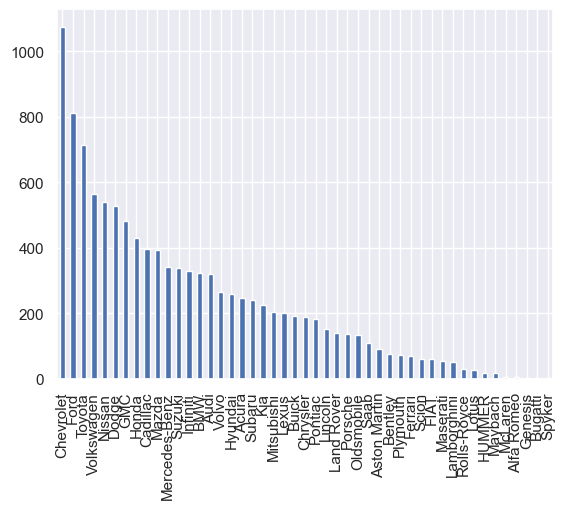

In [9]:
# Make a bar chart that displays how many times each brand of car appears in this data. 
make_counts = df['Make'].value_counts()

make_counts.plot(kind='bar')

# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.  And also sort the values so the bar chart displays from lowest to highest.

<Axes: >

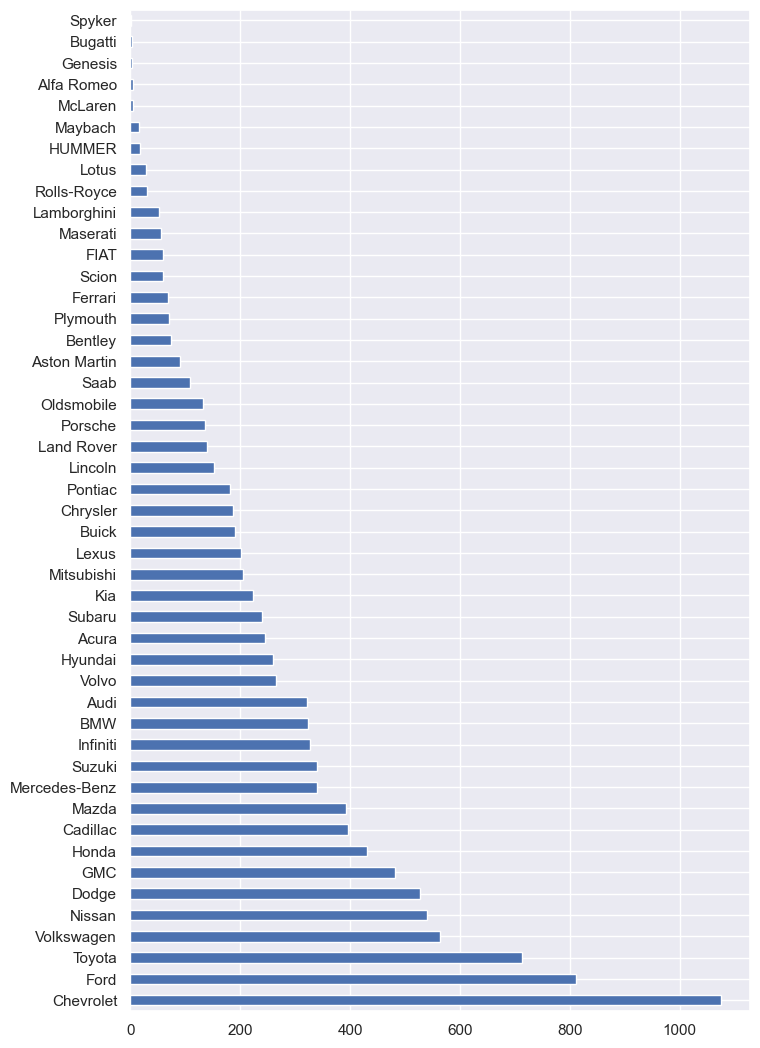

In [10]:
# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.
make_counts.plot(kind='barh', figsize=(8, 13))

### Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
* What's noticeable about it and what do you think the error is...


<Axes: xlabel='Year'>

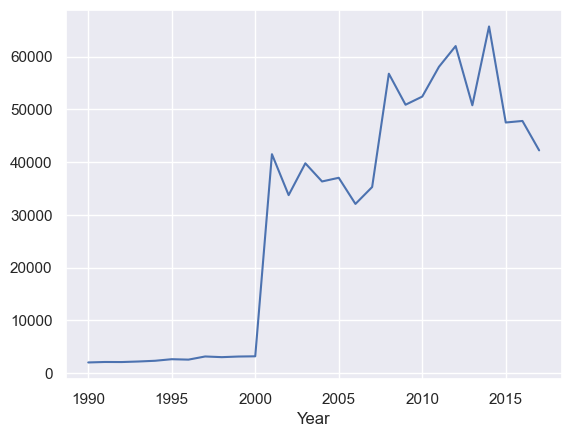

In [11]:
prices = df.groupby('Year')['MSRP'].mean()
prices.plot()

# It seems as though in the years before (and includig) 2000, they were counting in tens.
Make a new column that is called `adjusted_price`, that contains all prices, however, for every year before 2000 make it 10x the original MSRP.  
   * Hint; you might need to use our old friend `np.where`

In [12]:
# Make a column where is 10 when year is less than 2000, else 1.
df['price_adjuster'] =  np.where(df['Year'] <= 2000, 10, 1)

# Multiply the MSRP by the price adjuster.
df['adjusted_price'] = df['MSRP'] * df['price_adjuster']

# Replot the new adjusted price.  
* Make the y-axis start at 0 and go up to 100,000

<Axes: xlabel='Year'>

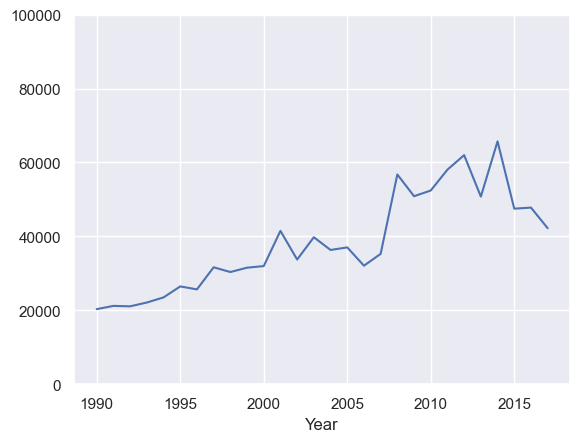

In [13]:
# Plot new prices
prices = df.groupby('Year')['adjusted_price'].mean()

prices.plot(ylim=(0, 100000))

# What are the top 5 car makers that make the most expensive cars on average. 
* I only want the top 5, make sure your answer is the top 5 and only the top 5. (hint, you can use .head())
* Use our `adjusted_price` column for this
* Hint; you're going to have to do a .groupby to answer this.

In [14]:
# What are the top 5 car makers make the most expensive cars on average. 
gb = df.groupby('Make')
tmp_df = gb['adjusted_price'].mean()

tmp_df= tmp_df.round(3)
tmp_df

tmp_df.sort_values(ascending=False).head()

Make
Bugatti        1757223.667
Maybach         546221.875
Rolls-Royce     351130.645
Lamborghini     331567.308
Bentley         247169.324
Name: adjusted_price, dtype: float64

# What are the 5 car makers that have the highest median highway MPG?

In [16]:
# Which car makers have the highest median highway MPG?
df.groupby('Make')['highway MPG'].median().sort_values(ascending=False).head()

Make
Alfa Romeo    34.0
FIAT          33.0
Volkswagen    32.0
Scion         32.0
Honda         32.0
Name: highway MPG, dtype: float64

# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.
* ['Chevrolet', 'Ford', 'Toyota']
* Set the 'hue='Make''.

<Axes: xlabel='adjusted_price', ylabel='Count'>

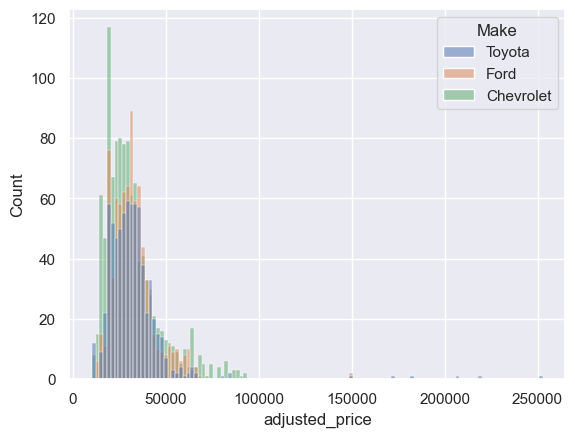

In [17]:
# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.
my_list = ['Chevrolet', 'Ford', 'Toyota']
tmp_df = df[df.Make.isin(my_list)]

# sns.displot(data=tmp_df, x='adjusted_price', hue='Make')
sns.histplot(data=tmp_df, x='adjusted_price', hue='Make')


# Remake the same histogram, but limit the x-axis from 0 to 100,000

(0.0, 100000.0)

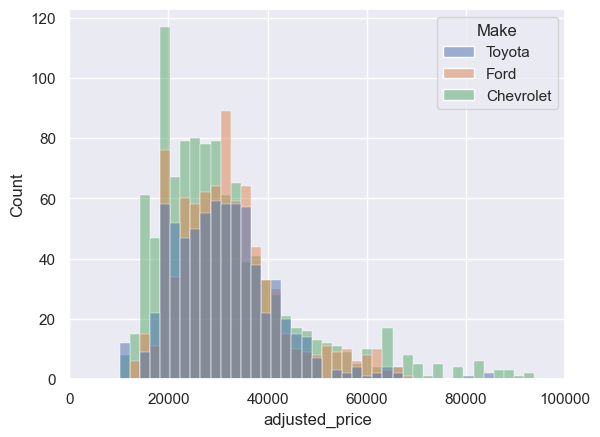

In [18]:
# Remake the same histogram, but limit the x-axis from 0 to 100,000
ax = sns.histplot(data=tmp_df, x='adjusted_price', hue='Make')
ax.set_xlim(0, 100000)

# Plot the relationship between Engine HP and highway MPG

<Axes: xlabel='Engine HP', ylabel='highway MPG'>

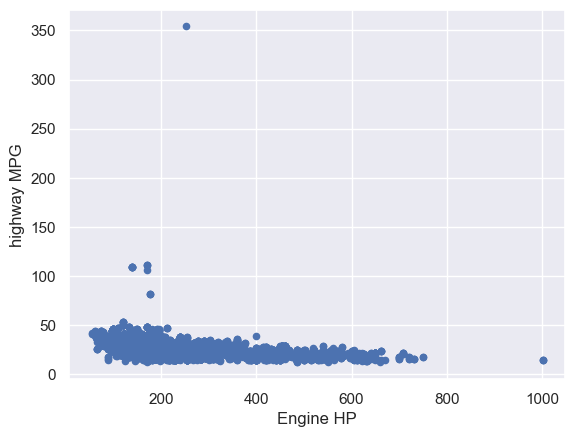

In [19]:
# Plot the relationship between Engine HP and highway MPG
df.plot(kind='scatter', x='Engine HP', y='highway MPG')

# Using `sns.boxplot`, create a boxplot for the 'Engine HP'

<Axes: xlabel='Engine HP'>

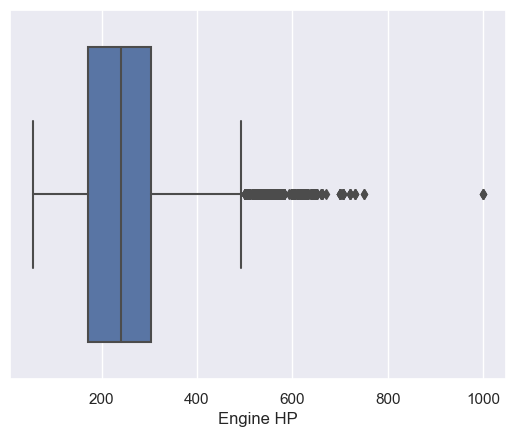

In [20]:
sns.boxplot(data=df, x='Engine HP')

# Make another boxplot for highway MPG

<Axes: xlabel='highway MPG'>

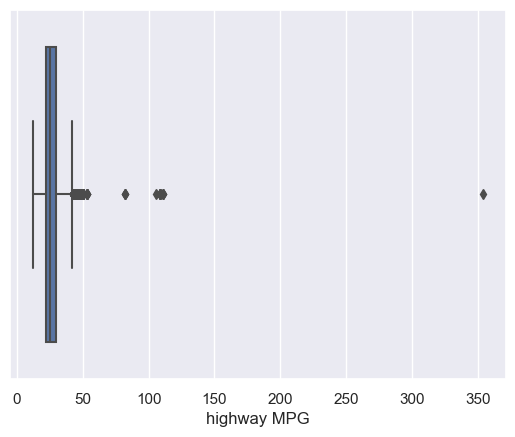

In [21]:
sns.boxplot(data=df, x='highway MPG')

# Remove any  outliers from Engine HP and highway MPG 

<img src='https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png' width=500>

* Outliers meaning values that are outside 1.5x the Inter Quartile Range (see image above).
* For each column (Engine HP and highway MPG):
* Calculate the 0.25 and 0.75 Quantiles
* Calculate the Inter Quartile Range (IQR)
* Create condition mask for the values that are outliers below (in the 'Minimum' range).
* Create condition mask for the values that are outliers above (in the 'Maximum' range).
* Filter the dataframe to remove any values that are in the above section _OR_ the below section. (hint; it may be easier to use the inverse selection '~'.
* Make the same boxplots of Engine HP and Highway MPG as before but with the this dataframe.

In [21]:
def remove_outliers(df, col_name):
    
    # Calculate Q1
    Q1 = df[col_name].quantile(.25)

    # Calculate Q3
    Q3 = df[col_name].quantile(.75)
    
    # Define the Inter Quartile Range (IQR)
    IQR = Q3 - Q1
    
    # Make select condition for the values that fall below the Q1 - 1.5*IQR
    outliers_below = df[col_name] <= (Q1 - 1.5 * IQR)
        
    # Make select condition for the values that fall above the Q3 - 1.5*IQR
    outliers_above = df[col_name] >= (Q3 + 1.5 * IQR)
    
    # Select the INVERSE of the selection
    df = df[ ~(outliers_above | outliers_below) ]
    
    return df
df = remove_outliers(df, 'Engine HP')
df = remove_outliers(df, 'highway MPG')

# Remake the boxplots for both Engine HP and highway MPG


<AxesSubplot:xlabel='Engine HP'>

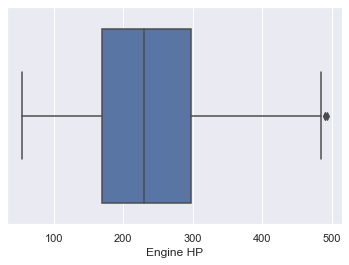

In [22]:
# Engine HP boxplot
sns.boxplot(data=df, x='Engine HP')

<AxesSubplot:xlabel='highway MPG'>

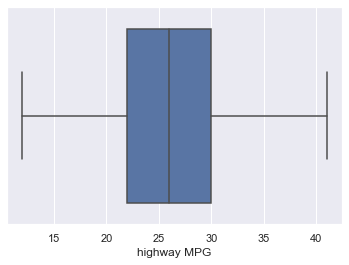

In [23]:
# highway MPG boxplot
sns.boxplot(data=df, x='highway MPG')

# Make a scatter plot of Engine HP vs highway MPG

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Engine HP', ylabel='highway MPG'>

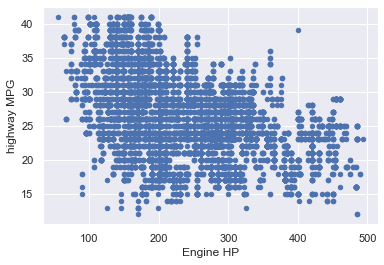

In [24]:
df.plot(kind='scatter', x='Engine HP', y='highway MPG')

# What does this plot tell you about how Engine HP affects highway MPG?

In [25]:
# What does this plot tell you about how Engine HP affects highway MPG?
print('It tells us that the higher the Engine HP, the less highway MPG the car will get.')

It tells us that the higher the Engine HP, the less highway MPG the car will get.


# Using a pairplot, display all of the linear relationship.
* Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

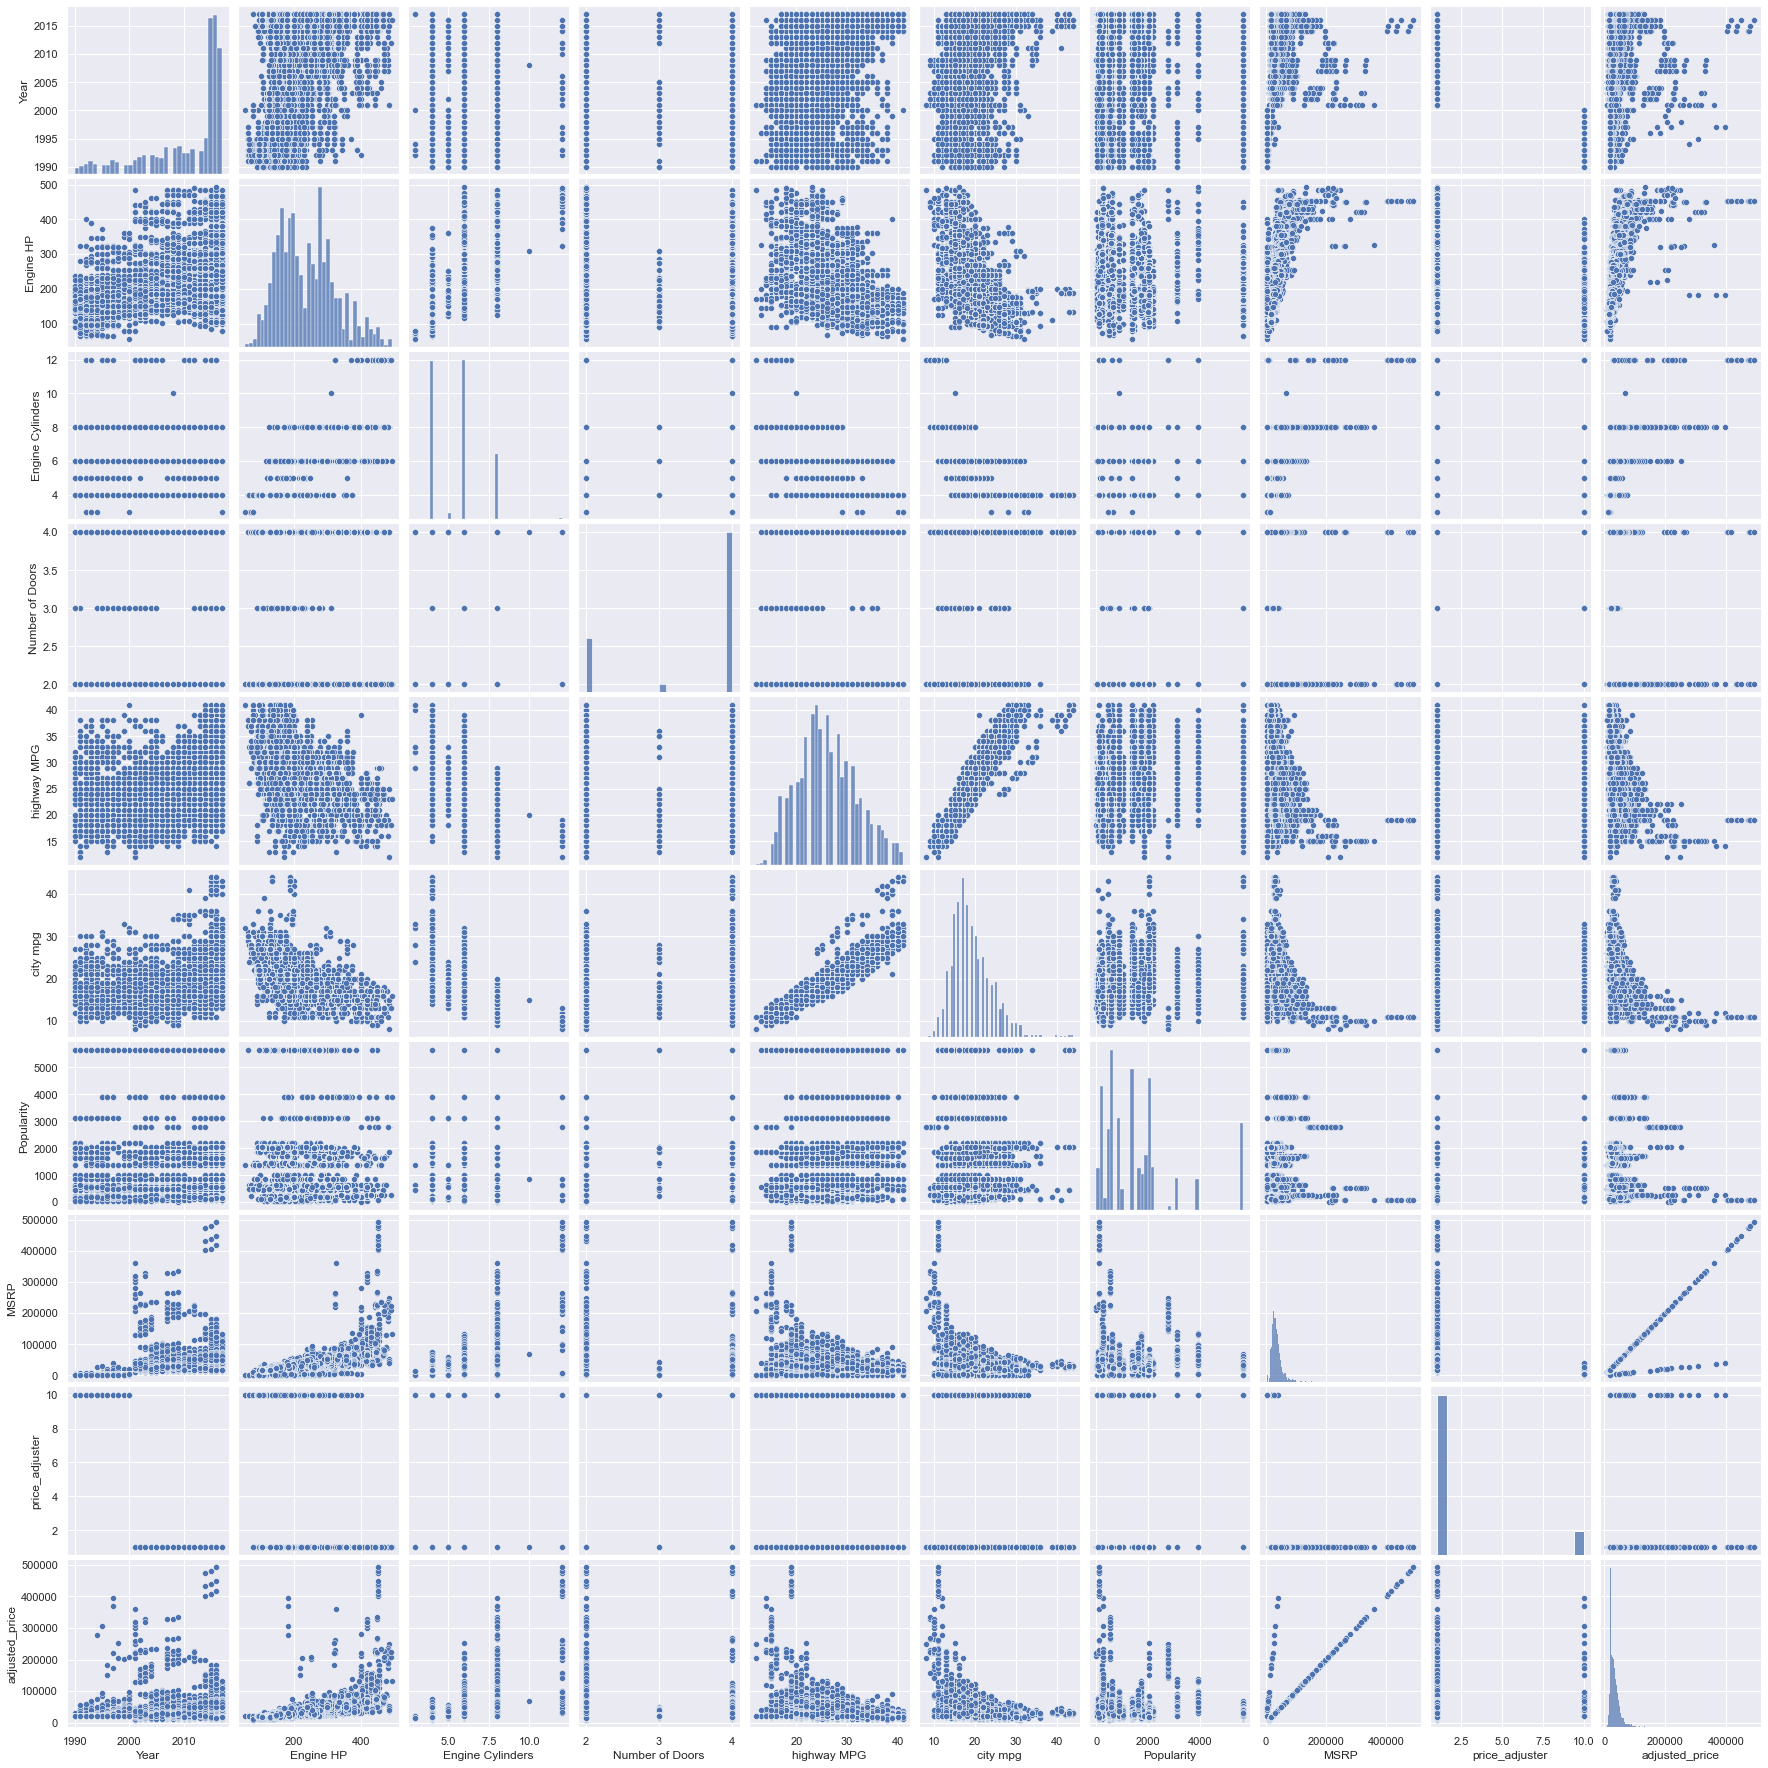

In [26]:
# Using a pairplot, display all of the linear relationship.
sns.pairplot(data=df);

In [27]:
# * Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).
print('city MPG', 'and', 'highway MPG')

city MPG and highway MPG


# Find which features actually have the strongest linear relationship using correlations.
* Make a heatmap plot of all of the correlations in our dataset.
* Change the figure size of our heatmap plot to be 8x8
* __Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.__

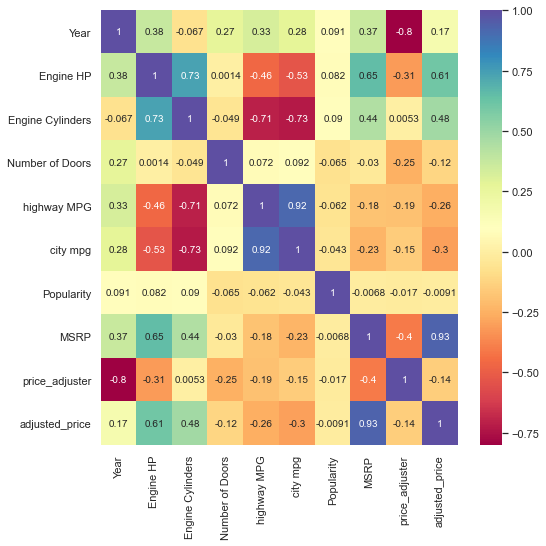

In [28]:
# * Make a heatmap plot of all of the correlations in our dataset.
# * Change the figure size of our heatmap plot to be 8x8
plt.figure(figsize=(8,8))

ax = sns.heatmap(df.corr(), annot=True, cmap='Spectral')

In [29]:
print('Engine HP has the strongest correlation with Engine Cylinders.')

Engine HP has the strongest correlation with Engine Cylinders.


# [EXTRA CREDIT] 
* In the column names, replace all the spaces with an underscore, and make them all lowercase as well


In [30]:
# * In the column names, replace all the spaces with an underscore, and make them all lowercase as well
new_column_names = []
for col in df.columns:
    new_column_names.append(col.replace(' ', '_').lower())
df.columns = new_column_names

In [31]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,price_adjuster,adjusted_price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,1,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,1,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,1,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,1,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,1,34500
